In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
tc=pd.read_csv('Telecom_customer_churn.csv')
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
tc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
tc.shape

(7043, 21)

In [5]:
tc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
tc['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
tc.loc[tc['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
tc['TotalCharges']=tc['TotalCharges'].replace(" ",np.nan)

In [10]:
tc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
tc['TotalCharges']=tc['TotalCharges'].astype(float)

In [12]:
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
tc['TotalCharges']=tc['TotalCharges'].fillna(np.mean(tc['TotalCharges']))

In [16]:
tc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No     5174
Yes    1869
Name: Churn, dtype: int64


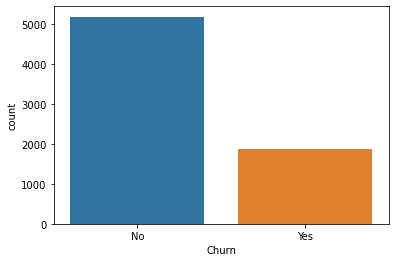

In [17]:
sns.countplot(x='Churn',data=tc)
print(tc['Churn'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


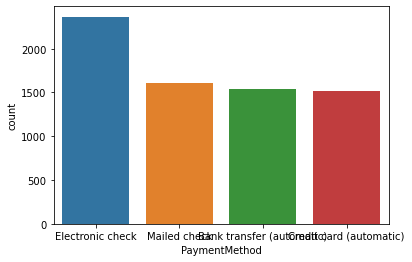

In [18]:
sns.countplot(x='PaymentMethod',data=tc)
print(tc['PaymentMethod'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


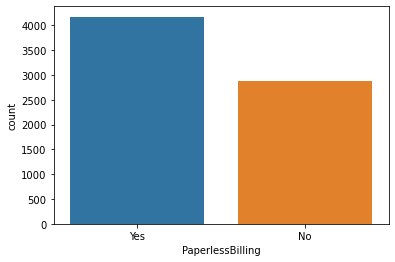

In [19]:
sns.countplot(x='PaperlessBilling',data=tc)
print(tc['PaperlessBilling'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


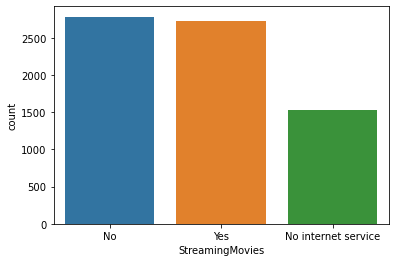

In [20]:
sns.countplot(x='StreamingMovies',data=tc)
print(tc['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


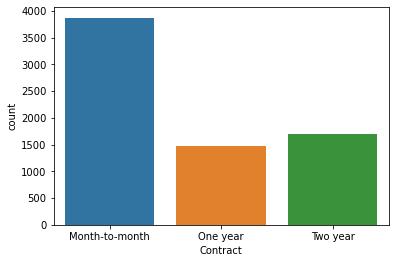

In [21]:
sns.countplot(x='Contract',data=tc)
print(tc['Contract'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


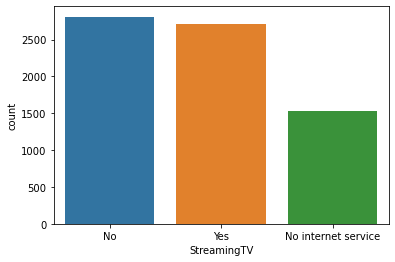

In [22]:
sns.countplot(x='StreamingTV',data=tc)
print(tc['StreamingTV'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


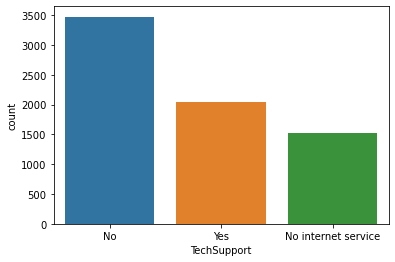

In [23]:
sns.countplot(x='TechSupport',data=tc)
print(tc['TechSupport'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


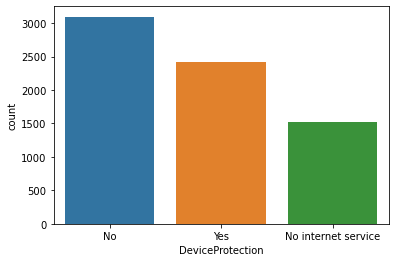

In [24]:
sns.countplot(x='DeviceProtection',data=tc)
print(tc['DeviceProtection'].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


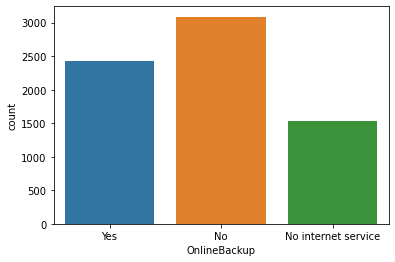

In [25]:
sns.countplot(x='OnlineBackup',data=tc)
print(tc['OnlineBackup'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


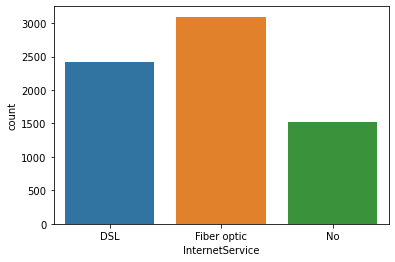

In [26]:
sns.countplot(x='InternetService',data=tc)
print(tc['InternetService'].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


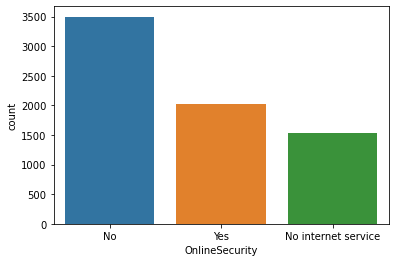

In [27]:
sns.countplot(x='OnlineSecurity',data=tc)
print(tc['OnlineSecurity'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


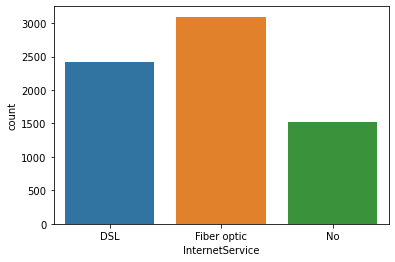

In [28]:
sns.countplot(x='InternetService',data=tc)
print(tc['InternetService'].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


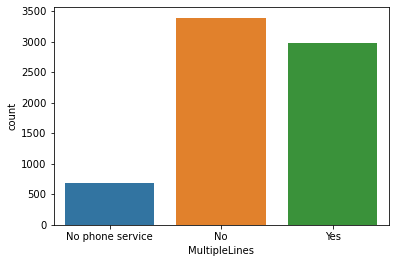

In [30]:
sns.countplot(x='MultipleLines',data=tc)
print(tc['MultipleLines'].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


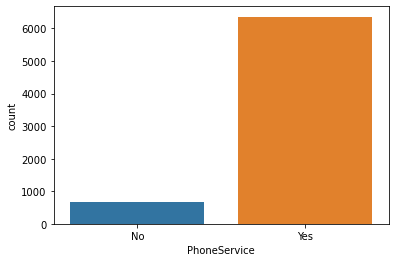

In [31]:
sns.countplot(x='PhoneService',data=tc)
print(tc['PhoneService'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


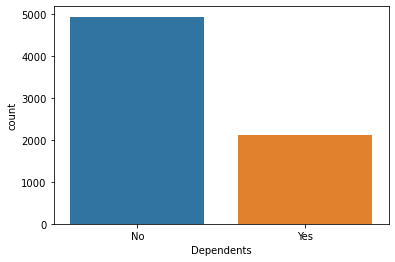

In [32]:
sns.countplot(x='Dependents',data=tc)
print(tc['Dependents'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


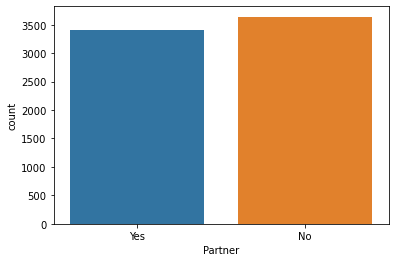

In [33]:
sns.countplot(x='Partner',data=tc)
print(tc['Partner'].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64


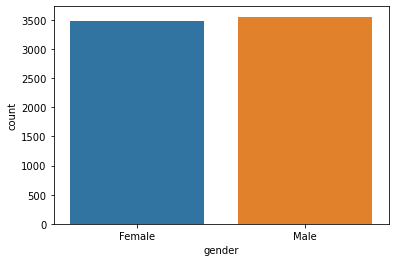

In [34]:
sns.countplot(x='gender',data=tc)
print(tc['gender'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


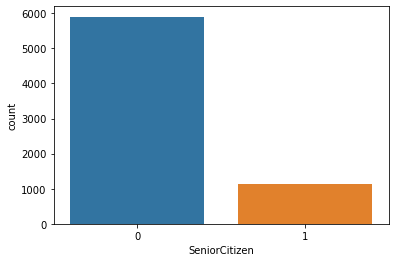

In [35]:
sns.countplot(x='SeniorCitizen',data=tc)
print(tc['SeniorCitizen'].value_counts())

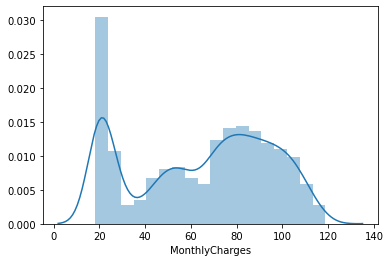

In [36]:
sns.distplot(tc['MonthlyCharges'],kde=True)

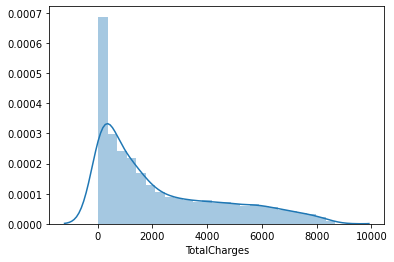

In [38]:
sns.distplot(tc['TotalCharges'],kde=True)

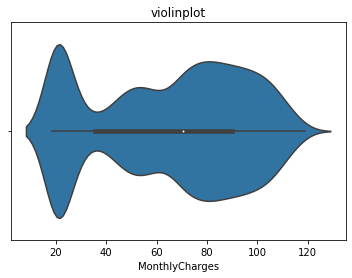

In [39]:
sns.violinplot(x='MonthlyCharges',data=tc)
plt.title('violinplot')
plt.show()

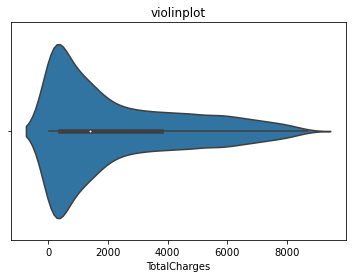

In [40]:
sns.violinplot(x='TotalCharges',data=tc)
plt.title('violinplot')
plt.show()

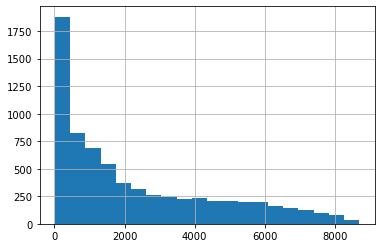

In [41]:
tc.TotalCharges.hist(bins=20)

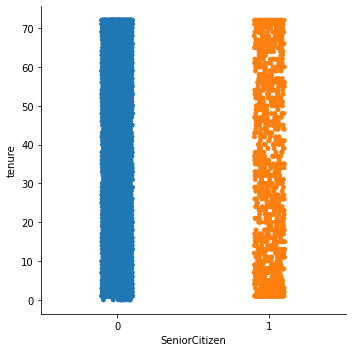

In [42]:
sns.catplot(x='SeniorCitizen',y='tenure',data=tc)

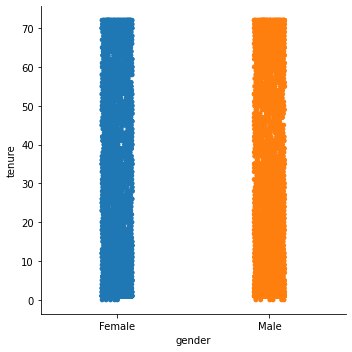

In [43]:
sns.catplot(x='gender',y='tenure',data=tc)

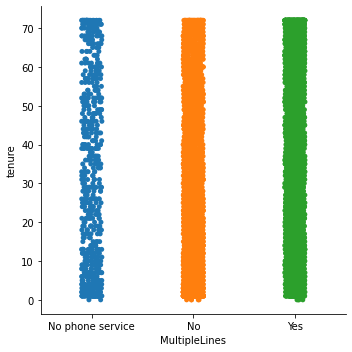

In [44]:
sns.catplot(x='MultipleLines',y='tenure',data=tc)

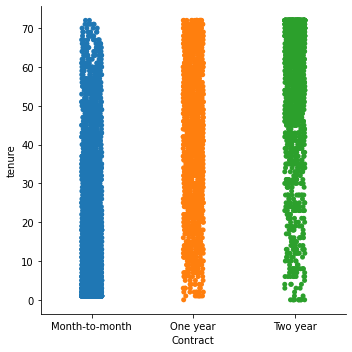

In [45]:
sns.catplot(x='Contract',y='tenure',data=tc)

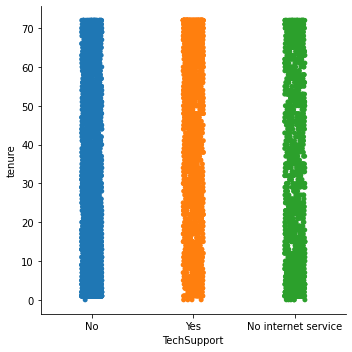

In [46]:
sns.catplot(x='TechSupport',y='tenure',data=tc)

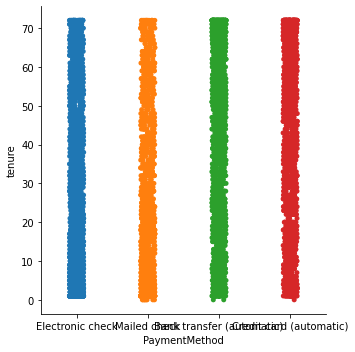

In [47]:
sns.catplot(x='PaymentMethod',y='tenure',data=tc)

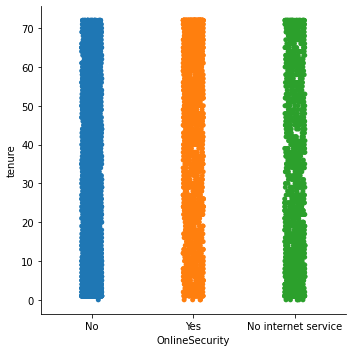

In [48]:
sns.catplot(x='OnlineSecurity',y='tenure',data=tc)

In [49]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in tc.columns:
    if tc[i].dtype=="object":
        tc[i]=enc.fit_transform(tc[i].values.reshape(-1,1))

In [50]:
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


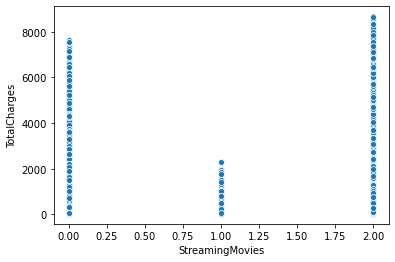

In [51]:
sns.scatterplot(x='StreamingMovies',y='TotalCharges',data=tc)

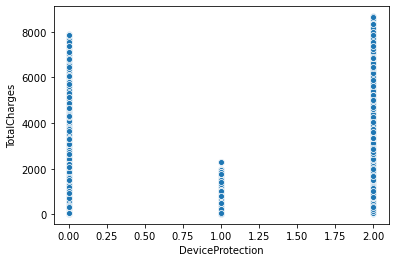

In [52]:
sns.scatterplot(x='DeviceProtection',y='TotalCharges',data=tc)

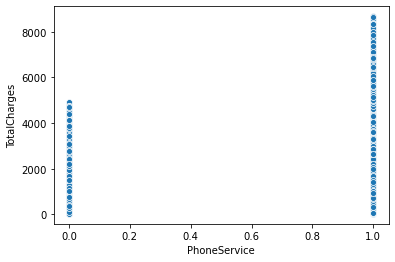

In [53]:
sns.scatterplot(x='PhoneService',y='TotalCharges',data=tc)

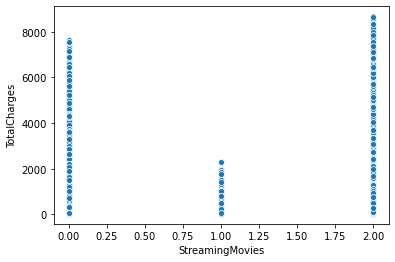

In [54]:
sns.scatterplot(x='StreamingMovies',y='TotalCharges',data=tc)

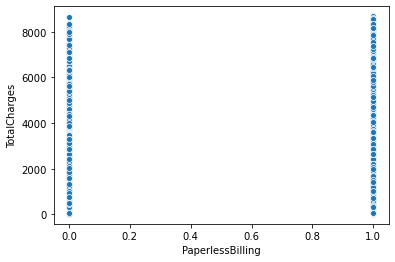

In [55]:
sns.scatterplot(x='PaperlessBilling',y='TotalCharges',data=tc)

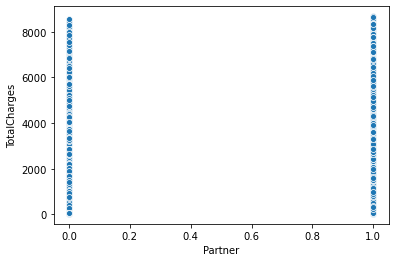

In [56]:
sns.scatterplot(x='Partner',y='TotalCharges',data=tc)

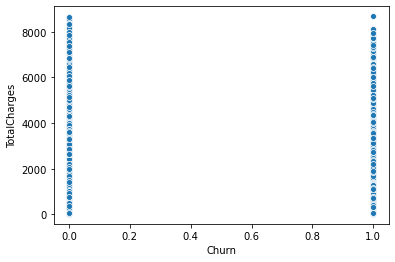

In [57]:
sns.scatterplot(x='Churn',y='TotalCharges',data=tc)

In [58]:
tc.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


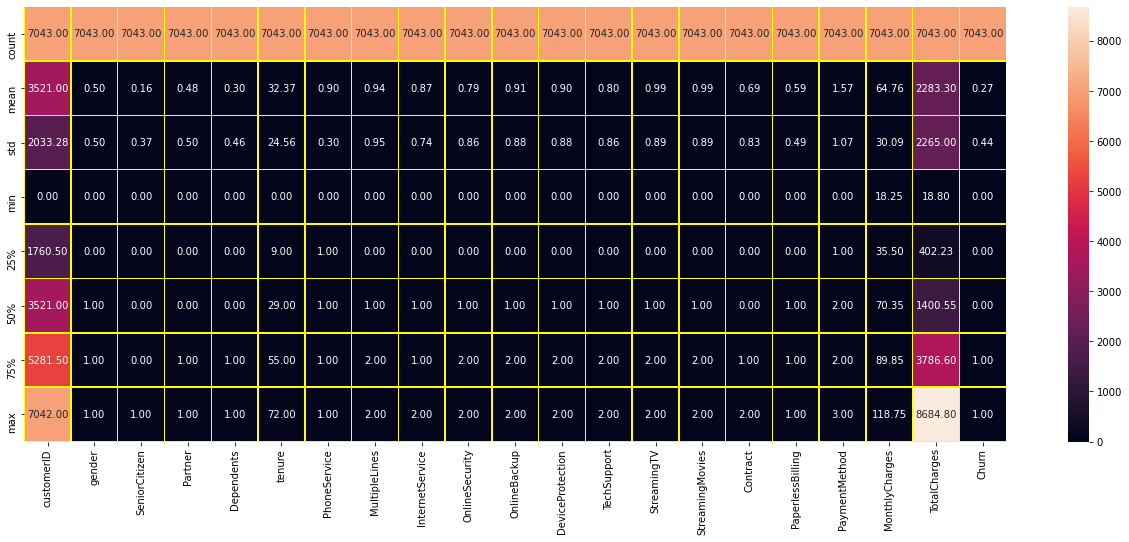

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))
sns.heatmap(tc.describe(),annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

In [60]:
tc.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


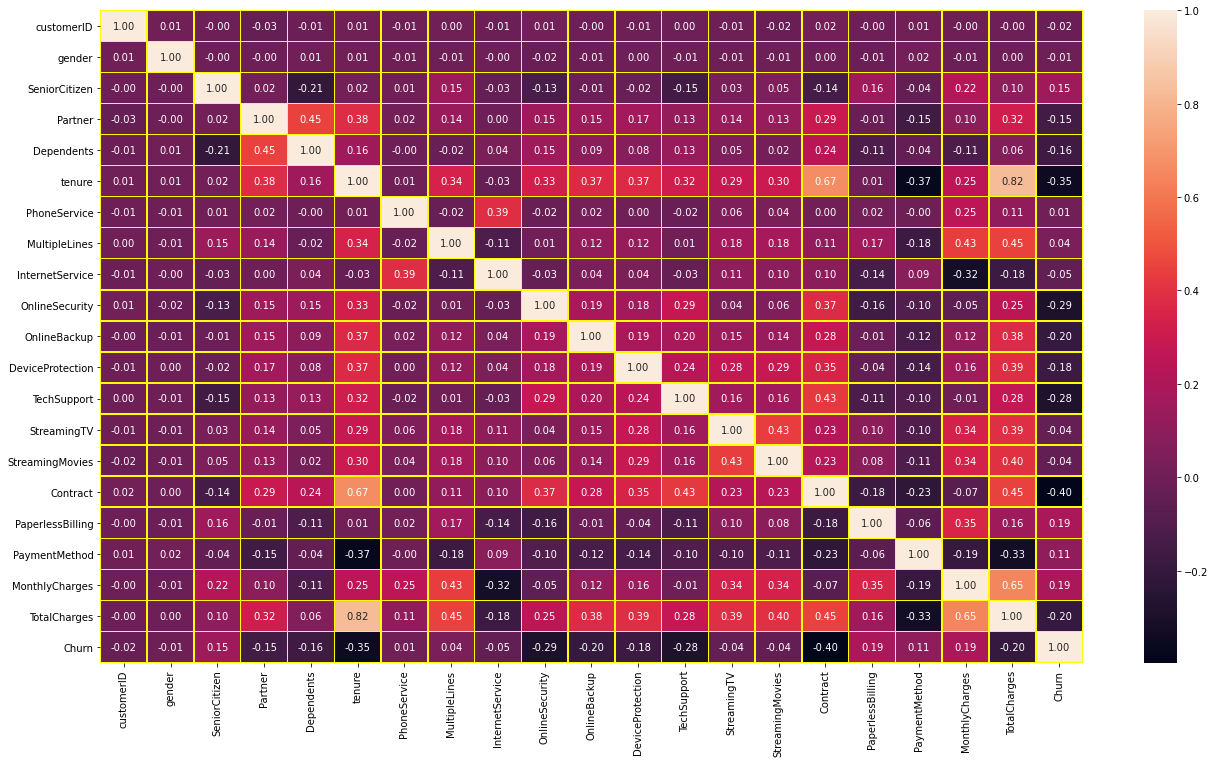

In [61]:
plt.figure(figsize=(22,12))
sns.heatmap(tc.corr(),annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

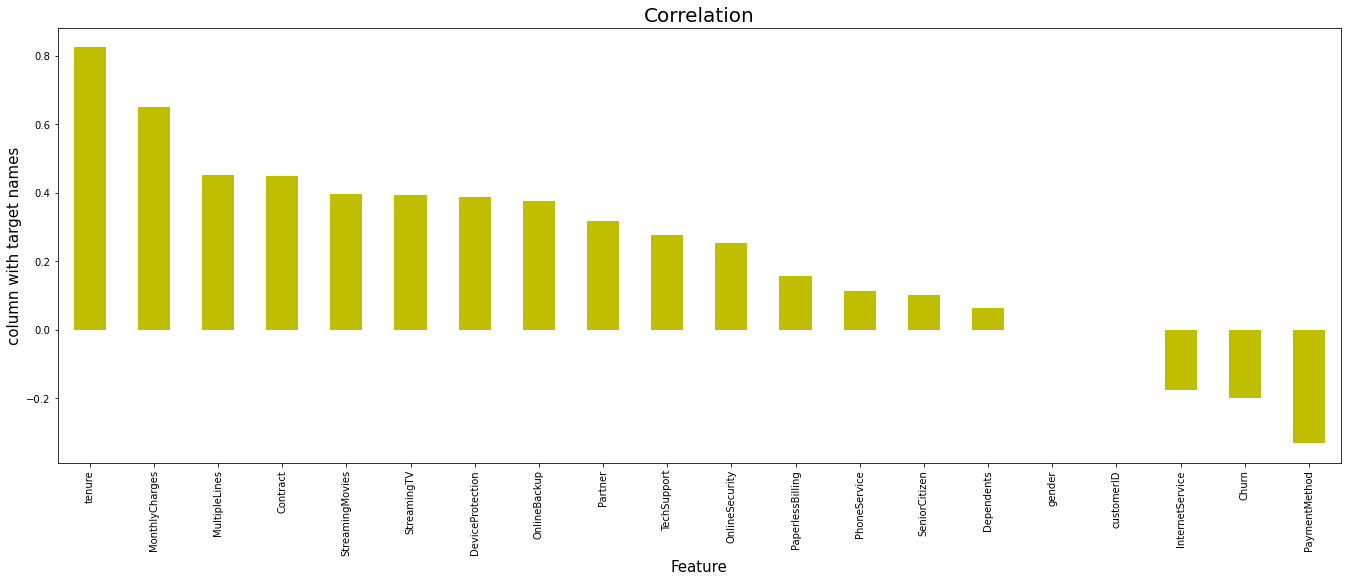

In [62]:
plt.figure(figsize=(23,8))
tc.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

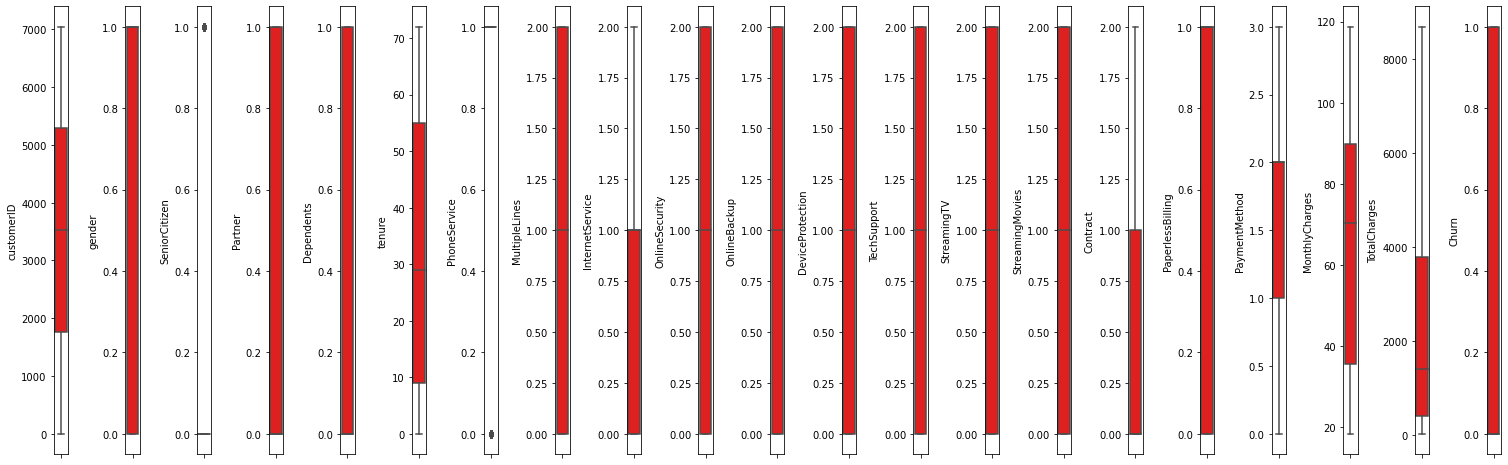

In [64]:
collist=tc.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(tc[collist[i]],color='red',orient='v')
    plt.tight_layout()

In [65]:
tc.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

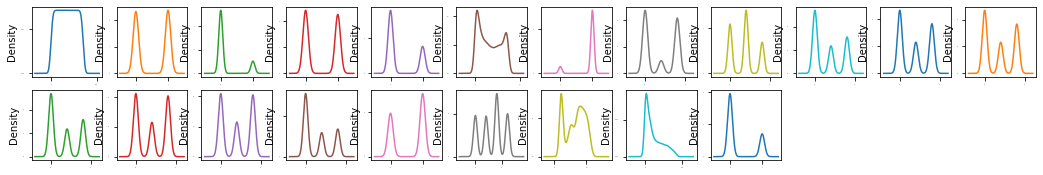

In [66]:
tc.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

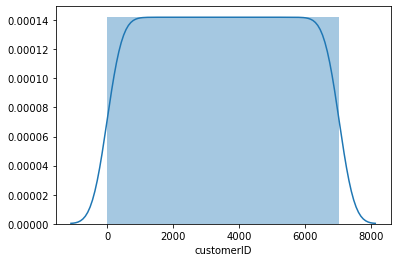

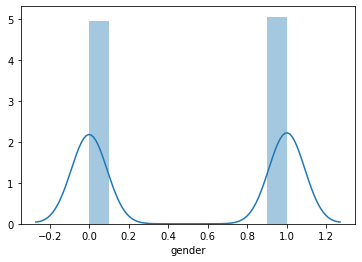

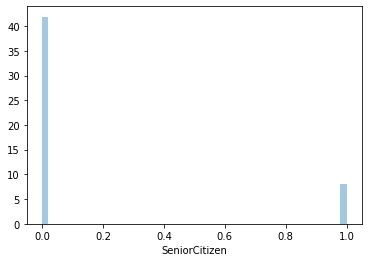

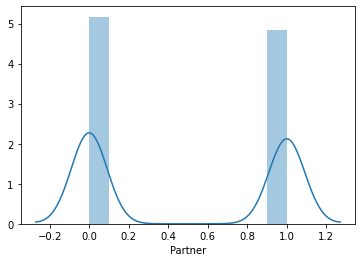

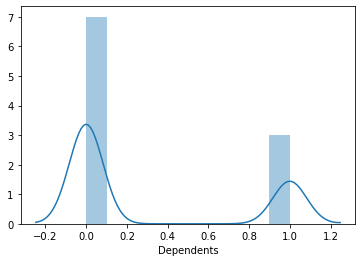

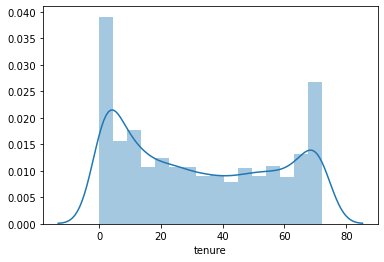

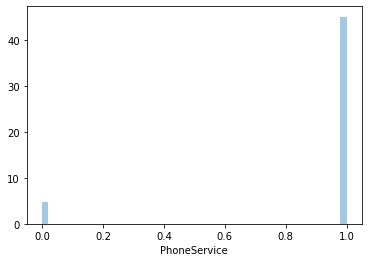

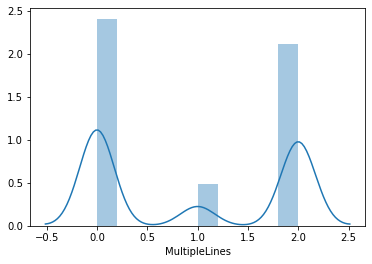

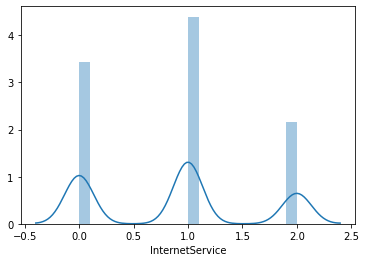

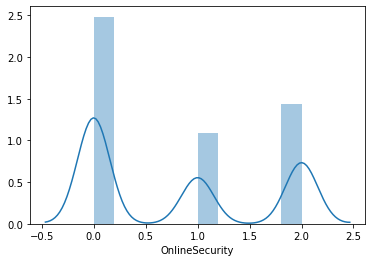

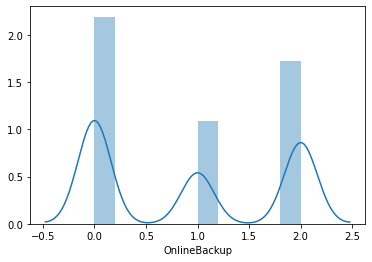

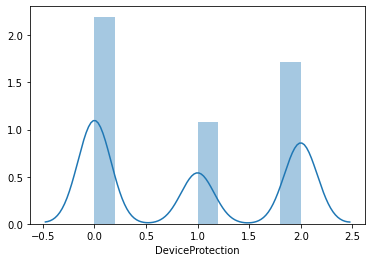

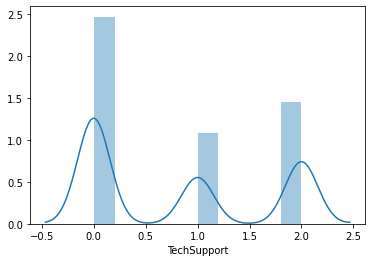

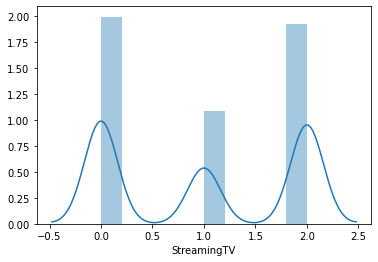

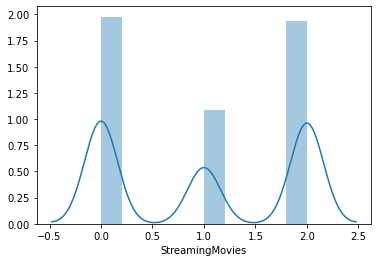

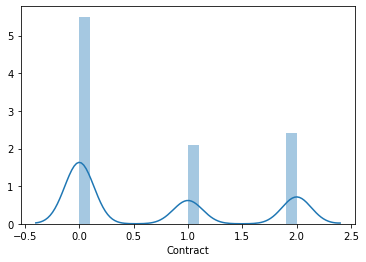

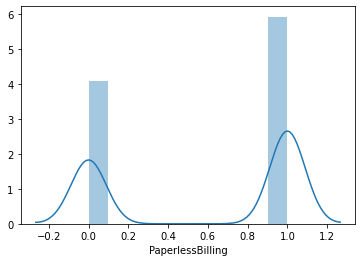

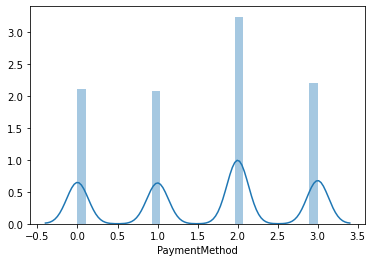

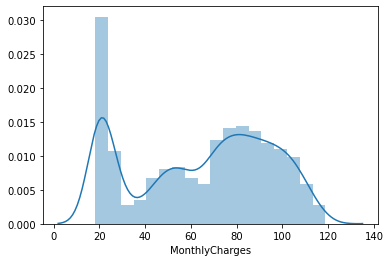

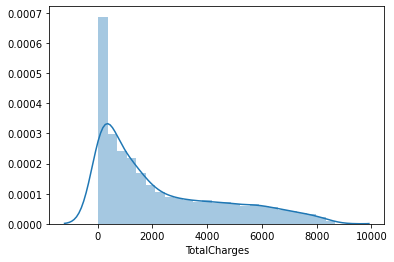

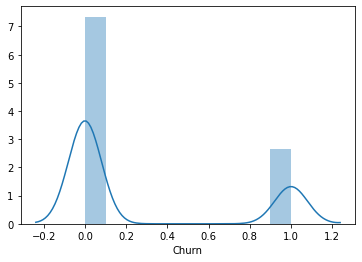

In [67]:
for k in tc.columns:
    plt.figure()
    sns.distplot(tc[k])

In [68]:
x=tc.drop(['TotalCharges'],axis=1)
y=tc['TotalCharges']

In [69]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [70]:
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    pred=ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.9027315353987987 on Random_state  1
Best Accuracy is  0.9027315353987987 on Random_state  1
Best Accuracy is  0.9027820070870235 on Random_state  3
Best Accuracy is  0.9055740063884725 on Random_state  4
Best Accuracy is  0.9069883069552265 on Random_state  5
Best Accuracy is  0.9069883069552265 on Random_state  5
Best Accuracy is  0.9069883069552265 on Random_state  5
Best Accuracy is  0.9077046446429337 on Random_state  8
Best Accuracy is  0.9086841782208316 on Random_state  9
Best Accuracy is  0.9086841782208316 on Random_state  9
Best Accuracy is  0.9086841782208316 on Random_state  9
Best Accuracy is  0.9086841782208316 on Random_state  9
Best Accuracy is  0.9086841782208316 on Random_state  9
Best Accuracy is  0.9086841782208316 on Random_state  9
Best Accuracy is  0.9086841782208316 on Random_state  9
Best Accuracy is  0.9086841782208316 on Random_state  9
Best Accuracy is  0.9086841782208316 on Random_state  9
Best Accuracy is  0.9086841782208316 on Random_s

Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.9101338497333613 on Random_state  32
Best Accuracy is  0.91013384973

Best Accuracy is  0.911174033278616 on Random_state  272
Best Accuracy is  0.911174033278616 on Random_state  272
Best Accuracy is  0.911174033278616 on Random_state  272
Best Accuracy is  0.911174033278616 on Random_state  272
Best Accuracy is  0.911174033278616 on Random_state  272
Best Accuracy is  0.911174033278616 on Random_state  272


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=272)
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('predicted price',pred)
print('actual price',y_test)
print('Error :-')
print('mean absolute error :-',mean_absolute_error(y_test,pred))
print('mean squared error :-',mean_squared_error(y_test,pred))
print('root mean squared error :-',np.sqrt(mean_squared_error(y_test,pred)))
from sklearn.metrics import r2_score
print('r2_score value :-',r2_score(y_test,pred))

predicted price [2867.06460339 1605.14671248 1678.38754828 ... 2722.3884375  3095.50202077
 3882.9799422 ]
actual price 571     2754.00
285     1783.60
5800    1345.65
910      688.65
2498    1389.85
         ...   
2553      37.20
5357    1258.15
6432    2130.45
1628    2627.20
3451    4555.20
Name: TotalCharges, Length: 2113, dtype: float64
Error :-
mean absolute error :- 549.4240949352206
mean squared error :- 471326.42867807375
root mean squared error :- 686.5321759961973
r2_score value :- 0.911174033278616


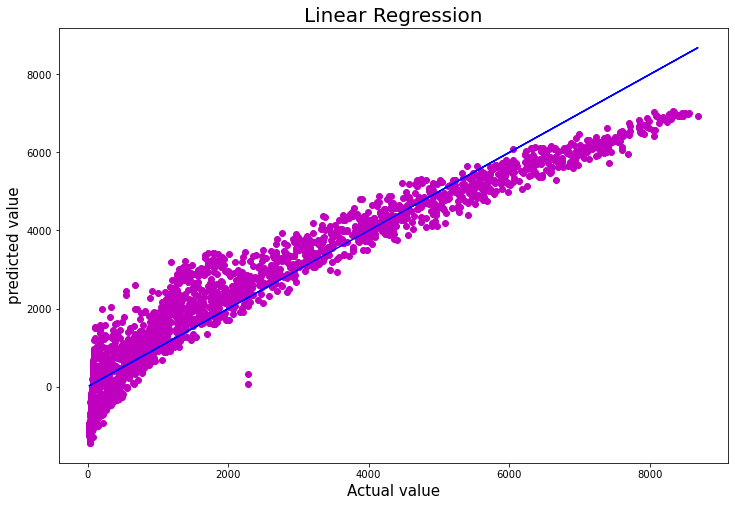

In [73]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_test,y=pred,color='m')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title("Linear Regression",fontsize=20)
plt.show()

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [75]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(1,20))}
en=ElasticNet()
gsp=GridSearchCV(en,parameters)
gsp.fit(x_train,y_train)
print(gsp.best_params_)

{'alpha': 0.0001, 'random_state': 1}


In [76]:
en=ElasticNet(alpha=0.0001,random_state=1)
en.fit(x_train,y_train)
preden=en.predict(x_test)
r2=r2_score(y_test,preden)
print(r2)

0.9111632698601783


In [77]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2=r2_score(y_test,predrf)
print(r2)

0.9986727474869813


In [78]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2=r2_score(y_test,predad)
print(r2)

0.964027744530231


In [79]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mae')
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2=r2_score(y_test,preddtr)
print(r2)

0.9967453125816507


In [80]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ln,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.9036665825623265


In [81]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(en,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.9036662244884


In [82]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(rf,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.9987319761839093


In [83]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ad,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.9637763455422561


In [84]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dtr,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.9969939077364263


minimum difference is r2score and cross validation score is for RandomForestRegressor() so this is our best model.

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2=r2_score(y_test,predrf)
print(r2)

0.9986524231561844


In [86]:
import joblib
joblib.dump(rf,'telecomchurnproject1.obj')

['telecomchurnproject1.obj']